# Databases Final Project: Exploratory Analysis using Tennis Data Set

This notebook outlines our queries of the tennis players, matches, and rankings databases. We perform large scale analysis on statistics and display them!

We take a look at the following statistics:
- General Data Analysis
- World Number 1 Ranking
- Performance by Age
- Performance by Country
- Performance by Handedness
- Player Analysis

In [1]:
import pandas as pd
import os

In [2]:
%load_ext sql

In [3]:
project_folder = %pwd
database_path = os.path.join(project_folder, 'archive', 'database.sqlite')
%sql sqlite:///{database_path}

# General Data Analysis

In our data tables, we have this many rows for each:
- matches : 932504
- players : 64675
- rankings: 3190379

In our data tables, we have this many columns for each:
- matches : 81
- players : 8
- rankings: 4

For more details on what is included in the data, please visit the Kaggle link: https://www.kaggle.com/datasets/guillemservera/tennis/data


Let's look at the number of players per ranking year and include info on the maximum points and average points per year.

In [4]:
%%sql result_set <<
SELECT
    SUBSTR(CAST(ranking_date AS STRING), 1, 4) AS ranking_year,
    COUNT(DISTINCT player) AS number_of_players,
    SUM(points) AS maxPoints,
    AVG(points) AS avgPoints
FROM
    rankings
GROUP BY
    ranking_year
HAVING
    maxPoints IS NOT NULL AND avgPoints IS NOT NULL
ORDER BY
    ranking_year


 * sqlite:////Users/thomasyu/Desktop/Project/archive/database.sqlite
Done.
Returning data to local variable result_set


We will display the data.

In [5]:
df = result_set.DataFrame()
display(df)

,ranking_year,number_of_players,maxPoints,avgPoints
0,1990,1602,4801538.0,85.677492
1,1991,1603,5595642.0,101.342787
2,1992,1697,6209566.0,107.059637
3,1993,1693,6877411.0,114.935759
4,1994,1729,7448389.0,118.955346
5,1995,1831,7598822.0,117.289302
6,1996,1901,8562352.0,125.422628
7,1997,1990,9370894.0,131.017477
8,1998,2062,9810755.0,127.164679
9,1999,2042,9779934.0,118.730306


Now let's analyze using heatmaps for each column individually.

In [6]:
# Separate the DataFrame into three DataFrames based on columns
df_number_of_players = df[['ranking_year', 'number_of_players']].copy()
df_maxPoints = df[['ranking_year', 'maxPoints']].copy()
df_avgPoints = df[['ranking_year', 'avgPoints']].copy()

Let's see number of players over the years.

In [7]:
# Apply background gradient styling on number of players.
styled_df_gradient = (
    df_number_of_players
    .style
    .background_gradient(cmap='viridis', axis=None)
)
# Display the styled DataFrame with background gradient
display(styled_df_gradient)

,ranking_year,number_of_players
0,1990,1602
1,1991,1603
2,1992,1697
3,1993,1693
4,1994,1729
5,1995,1831
6,1996,1901
7,1997,1990
8,1998,2062
9,1999,2042


As we can see, there are more professional tennis players as the years go on.

In [8]:
# Apply background gradient styling on maximum points in a year.
styled_df_gradient = (
    df_maxPoints
    .style
    .background_gradient(cmap='viridis', axis=None)
)
# Display the styled DataFrame with background gradient
display(styled_df_gradient)

,ranking_year,maxPoints
0,1990,4801538.000000
1,1991,5595642.000000
2,1992,6209566.000000
3,1993,6877411.000000
4,1994,7448389.000000
5,1995,7598822.000000
6,1996,8562352.000000
7,1997,9370894.000000
8,1998,9810755.000000
9,1999,9779934.000000


In [9]:
# Apply background gradient styling on average points per player.
styled_df_gradient = (
    df_avgPoints
    .style
    .background_gradient(cmap='viridis', axis=None)
)
# Display the styled DataFrame with background gradient
display(styled_df_gradient)

,ranking_year,avgPoints
0,1990,85.677492
1,1991,101.342787
2,1992,107.059637
3,1993,114.935759
4,1994,118.955346
5,1995,117.289302
6,1996,125.422628
7,1997,131.017477
8,1998,127.164679
9,1999,118.730306


The number of players each year increases, which is entirely expected! We know that tennis is still a growing sport despite its long history. We can see the increasing popularity and competition as the maximum points and average points are generally increasing each year. This means that there are tournaments and more players are participating in the tournaments.

We will be using the year a lot. In the data, the dates are represented as a single number, so we will need to extract the year from that date number. Here, we create a temporary table for the ranking year. Additionally, the rankings table does not include player names, so we will add that as well.

In [10]:
%%sql
CREATE TEMP TABLE player_rankings AS
SELECT
    r.*,
    p.*,
    p.name_first || ' ' || p.name_last AS player_name,
    SUBSTR(CAST(r.ranking_date AS STRING), 1, 4) AS year
FROM
    rankings AS r
LEFT JOIN
    players AS p ON p.player_id = r.player

 * sqlite:////Users/thomasyu/Desktop/Project/archive/database.sqlite
Done.


[]

# World Number 1 Ranking

Since we have data about player rankings, it will be interesting to see which players have consistently been ranked number 1 over time. This can give us insight on who we might consider to be the GOAT (Greatest of All Time). 

In [11]:
%%sql
SELECT
    player_name, COUNT(*) as ranked_first, count(DISTINCT year) as years_being_first
FROM
    player_rankings
WHERE
    rank = 1
GROUP BY
    player_name
ORDER BY
    ranked_first desc
LIMIT
    25

 * sqlite:////Users/thomasyu/Desktop/Project/archive/database.sqlite
Done.


player_name,ranked_first,years_being_first
Novak Djokovic,355,12
Roger Federer,307,9
Pete Sampras,285,8
Ivan Lendl,228,8
Rafael Nadal,193,10
John McEnroe,136,6
Jimmy Connors,104,8
Andre Agassi,100,5
Bjorn Borg,94,4
Lleyton Hewitt,80,3


Just as suspected, we can see that the big three (Djokovic, Nadal, and Federer) are quite dominant even among the best in history. We can also see some other big names and how they compare.

# Performance by Age

We can look at the players table a bit more. THe table also has dob (date of birth) for the player so we can use it to identify how old they are.

### Age Analysis

In [12]:
%%sql result_set <<
SELECT
    year,
    AVG(year - CAST(SUBSTR(dob, 1, 4) AS INT)) AS average_age
FROM
    player_rankings
WHERE
    rank = 1
GROUP BY
    year
ORDER BY
    year asc

 * sqlite:////Users/thomasyu/Desktop/Project/archive/database.sqlite
Done.
Returning data to local variable result_set


In [13]:
df = result_set.DataFrame()
display(df)

,year,average_age
0,1973,27.000000
1,1974,24.600000
2,1975,23.000000
3,1976,24.000000
4,1977,24.875000
5,1978,26.000000
6,1979,24.128205
7,1980,23.733333
8,1981,23.714286
9,1982,24.272727


Let's plot this on a graph to make it easier to interpret.

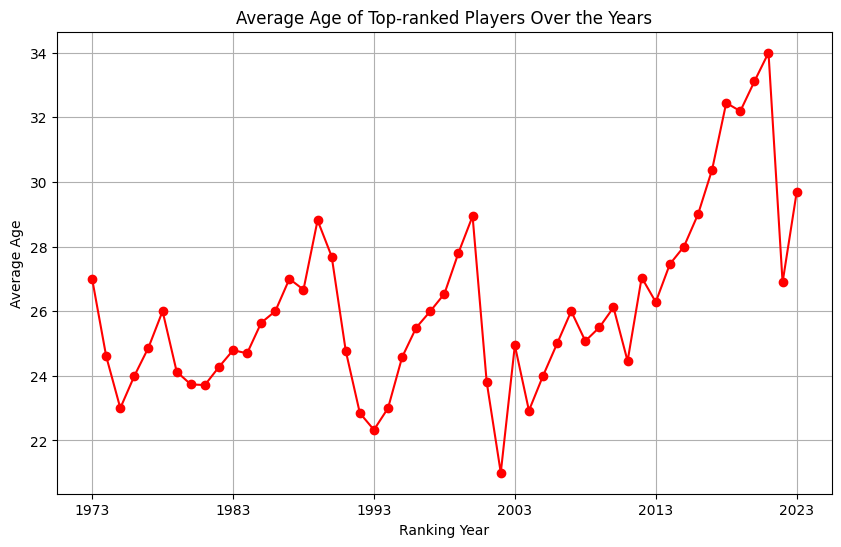

In [14]:
import matplotlib.pyplot as plt

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df['year'], df['average_age'], marker='o', linestyle='-', color='r')
plt.title('Average Age of Top-ranked Players Over the Years')
plt.xlabel('Ranking Year')
plt.ylabel('Average Age')
plt.xticks(df['year'][::10])
plt.grid(True)
plt.show()

The age of the number 1 ranked player seems to iterate through eras. It creeps up for a number of years and then sinks down again as a new champion takes over the reigns. From the year 2000 to 2020 we can see that this is the era of the big 3 as they dominate and age.

We can also take a look at different ranking positions other than world number 1.

In [15]:
%%sql result_set <<
SELECT
    year,
    ROUND(MAX(CASE WHEN rank = 1 THEN average_age ELSE NULL END), 2) AS rank_1,
    ROUND(MAX(CASE WHEN rank < 5 THEN average_age ELSE NULL END), 2) AS top_5,
    ROUND(MAX(CASE WHEN rank < 10 THEN average_age ELSE NULL END), 2) AS top_10,
    ROUND(MAX(CASE WHEN rank < 20 THEN average_age ELSE NULL END), 2) AS top_20,
    ROUND(MAX(CASE WHEN rank < 50 THEN average_age ELSE NULL END), 2) AS top_50,
    ROUND(MAX(CASE WHEN rank < 100 THEN average_age ELSE NULL END), 2) AS top_100
FROM (
    SELECT
        year,
        rank,
        AVG(year - CAST(SUBSTR(dob, 1, 4) AS INT)) AS average_age
    FROM
        player_rankings
    GROUP BY
        year, rank
) subquery
GROUP BY
    year
ORDER BY
    year ASC

 * sqlite:////Users/thomasyu/Desktop/Project/archive/database.sqlite
Done.
Returning data to local variable result_set


In [16]:
df = result_set.DataFrame()
display(df)

,year,rank_1,top_5,top_10,top_20,top_50,top_100
0,1973,27.00,28.29,34.14,34.14,34.14,34.14
1,1974,24.60,31.00,31.50,31.50,31.50,31.50
2,1975,23.00,31.25,35.86,35.86,35.86,35.86
3,1976,24.00,27.00,33.50,33.50,34.00,35.00
4,1977,24.88,26.13,27.03,33.41,33.41,33.41
5,1978,26.00,26.00,27.09,29.88,30.13,30.13
6,1979,24.13,25.74,30.67,30.67,30.67,30.67
7,1980,23.73,27.69,27.69,27.69,28.32,29.80
8,1981,23.71,27.36,27.60,27.60,29.26,29.26
9,1982,24.27,27.59,27.59,28.48,28.64,28.64


Let's also graph this to make it more interpretable.

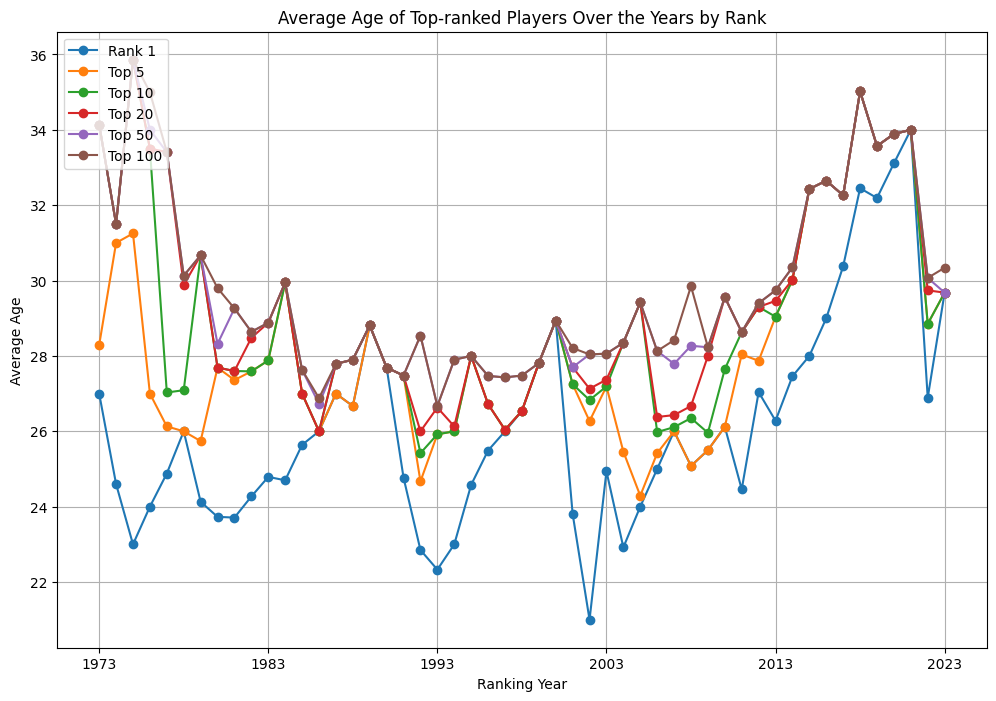

In [17]:
# Plot the data
plt.figure(figsize=(12, 8))

plt.plot(df['year'], df['rank_1'], marker='o', linestyle='-', label='Rank 1')
plt.plot(df['year'], df['top_5'], marker='o', linestyle='-', label='Top 5')
plt.plot(df['year'], df['top_10'], marker='o', linestyle='-', label='Top 10')
plt.plot(df['year'], df['top_20'], marker='o', linestyle='-', label='Top 20')
plt.plot(df['year'], df['top_50'], marker='o', linestyle='-', label='Top 50')
plt.plot(df['year'], df['top_100'], marker='o', linestyle='-', label='Top 100')

plt.title('Average Age of Top-ranked Players Over the Years by Rank')
plt.xlabel('Ranking Year')
plt.ylabel('Average Age')
plt.xticks(df['year'][::10])
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


There are some interesting patterns here. Seems that the average age moves together and varies a lot throughout the years. This indicates that the overall players on tour are varying in a age a lot through the years. Seems that professional players come in waves and generations. Very interesting.

In the graph, it appears that the number ranking seems to be a bit younger than the rest of the pack. I wonder if this is because youth has an advantage. Let's look at the youngest number 1 players.

In [18]:
%%sql
WITH RankedPlayers AS (
    SELECT
        year,
        player_name,
        year - CAST(SUBSTR(dob, 1, 4) AS INT) AS age,
        ROW_NUMBER() OVER(PARTITION BY year, player_name ORDER BY year ASC) AS row
    FROM
        player_rankings
    WHERE rank = 1
)

SELECT
    year,
    player_name,
    age
FROM
    RankedPlayers
WHERE
    row = 1
ORDER BY
    age ASC
LIMIT
    25


 * sqlite:////Users/thomasyu/Desktop/Project/archive/database.sqlite
Done.


year,player_name,age
2022,Carlos Alcaraz,19
2000,Marat Safin,20
2001,Lleyton Hewitt,20
2023,Carlos Alcaraz,20
1977,Bjorn Borg,21
1980,John McEnroe,21
2001,Marat Safin,21
2002,Lleyton Hewitt,21
2003,Andy Roddick,21
1974,Jimmy Connors,22


We can see some of the greats, and how successful they were at such young ages. We can also see a more recent young guy doing well (Carlos Alcaraz). Great for the future of tennis!

# Performance by Handedness

As a left-handed tennis player myself, I have heard many times that it is an advantage. I wonder if this is true in professional tennis as well. Let's find out!

In [19]:
%%sql
SELECT
    hand,
    COUNT(*) AS cases,
    AVG(rank) AS ranking_by_hand
FROM
    player_rankings
WHERE
    hand IN ('L', 'R')
GROUP BY
    hand
LIMIT
    10

 * sqlite:////Users/thomasyu/Desktop/Project/archive/database.sqlite
Done.


hand,cases,ranking_by_hand
L,278010,674.2971439876263
R,2234345,731.5845811636073


There seems to be a clear correlation between handedness and ranking. Lefties are ranked higher (lower number is better) than righties on average.

Let's see what percentage of high rankings are lefties. Let's start with the top 10.

In [20]:
%%sql
SELECT
    rank,
    (sum(CASE WHEN hand = 'L' THEN 1 ELSE 0 END) / CAST(count(*) AS REAL)) * 100 AS lefties_percentage
FROM
    player_rankings
WHERE
    rank <= 10
GROUP BY
    rank
LIMIT
    10


 * sqlite:////Users/thomasyu/Desktop/Project/archive/database.sqlite
Done.


rank,lefties_percentage
1,20.0
2,31.41831238779174
3,19.53195319531953
4,15.01123595505618
5,15.985630893578806
6,15.92442645074224
7,12.398921832884097
8,9.712230215827338
9,13.689407540394974
10,12.455035971223023


As we can see, it is a small percentage, but there are a lot of lefties ranked high in the top 10 all the time. Especially in the top 3 players. These guys are much more frequently left-handed. This is likely skewed due to super star players such as Rafael Nadal and John McEnroe, who were/are lefties.

Let's see what percentage of the top 100 players are lefties.

In [21]:
%%sql
SELECT
    (SUM(CASE WHEN hand = 'L' THEN 1 ELSE 0 END) / CAST(COUNT(*) AS REAL)) * 100 AS lefties_percentage
FROM
    player_rankings
WHERE
    rank <= 100

 * sqlite:////Users/thomasyu/Desktop/Project/archive/database.sqlite
Done.


lefties_percentage
14.816479737474994


So just under 15% of top 100 players in the world are lefty usually. That doesn't seem like a lot. Let's compare this with how many players are lefty in the first place.

In [22]:
%%sql
SELECT
    hand,
    COUNT(*) AS total_cases,
    AVG(rank) AS ranking_by_hand,
    COUNT(*) * 100.0 / SUM(COUNT(*)) OVER () AS percentage_of_total
FROM
    player_rankings
WHERE
    hand IN ('L', 'R')
GROUP BY
    hand
LIMIT
    10


 * sqlite:////Users/thomasyu/Desktop/Project/archive/database.sqlite
Done.


hand,total_cases,ranking_by_hand,percentage_of_total
L,278010,674.2971439876263,11.065713245142506
R,2234345,731.5845811636073,88.9342867548575


So only 11% of the players were lefty in the first place. Yet, all the top ranking positions have a higher percentage of lefties occupying. This makes it pretty evident that being left-handed is an advantage in tennis!

It is also worth noting that some players on tour don't have known handedness. That data was omitted from our analysis.

# Performance by Country

Now we will look at players performance based on what country they are from. We will look at how many points countries have in total from their players. Total points will indicate both how strong players are from a country as well as how many players reside from said country. A country with many strong players will have more points. 

In [23]:
%%sql
SELECT
    ioc, sum(points) as country_points
FROM
    player_rankings
GROUP BY
    ioc
ORDER BY
    country_points desc
LIMIT
    25

 * sqlite:////Users/thomasyu/Desktop/Project/archive/database.sqlite
Done.


ioc,country_points
ESP,36384117.0
USA,32983420.0
FRA,26052278.0
GER,19536655.0
ARG,18709291.0
ITA,14498405.0
RUS,13312107.0
AUS,13006544.0
SUI,11621000.0
SRB,11267457.0


As we can see, Spain holds the most overall points. This likely indicates they have a lot of professional tennis players, and their players are strong!

We can also see whether countries are able to top the rankings over the years. We expect countries that had a high number of total points to do well here (Spain, USA, Franace). This will show which countries are able to produce champions. Let's only take a look at the top 10 countries with the most points. 

In [24]:
%%sql result_set <<
SELECT
    year,
    MAX(CASE WHEN ioc = 'ESP' THEN highest_ranked_player END) AS ESP,
    MAX(CASE WHEN ioc = 'USA' THEN highest_ranked_player END) AS USA,
    MAX(CASE WHEN ioc = 'FRA' THEN highest_ranked_player END) AS FRA,
    MAX(CASE WHEN ioc = 'GER' THEN highest_ranked_player END) AS GER,
    MAX(CASE WHEN ioc = 'ARG' THEN highest_ranked_player END) AS ARG,
    MAX(CASE WHEN ioc = 'ITA' THEN highest_ranked_player END) AS ITA,
    MAX(CASE WHEN ioc = 'RUS' THEN highest_ranked_player END) AS RUS,
    MAX(CASE WHEN ioc = 'AUS' THEN highest_ranked_player END) AS AUS,
    MAX(CASE WHEN ioc = 'SUI' THEN highest_ranked_player END) AS SUI,
    MAX(CASE WHEN ioc = 'SRB' THEN highest_ranked_player END) AS SRB
FROM (
    SELECT
        ioc,
        year,
        MIN(rank) AS highest_ranked_player
    FROM
        player_rankings
    WHERE ioc IN ('ESP', 'USA','FRA','GER','ARG','ITA','RUS','AUS','SUI','SRB')
    GROUP BY
        ioc, year
) subquery
GROUP BY
    year
ORDER BY
    year


 * sqlite:////Users/thomasyu/Desktop/Project/archive/database.sqlite
Done.
Returning data to local variable result_set


In [25]:
df = result_set.DataFrame()
display(df)

,year,ESP,USA,FRA,GER,ARG,ITA,RUS,AUS,SUI,SRB
0,1973,2,3,23,20,27,8,32.0,2,126,111.0
1,1974,9,1,20,33,5,12,9.0,1,148,121.0
2,1975,5,1,26,31,2,14,13.0,2,156,92.0
3,1976,4,1,19,36,3,6,47.0,9,190,134.0
4,1977,4,1,27,34,2,7,60.0,11,234,68.0
5,1978,7,1,38,28,2,7,144.0,12,48,122.0
6,1979,7,1,22,19,3,10,NaN,15,51,312.0
7,1980,7,1,12,23,4,19,249.0,18,24,309.0
8,1981,23,1,12,30,4,17,NaN,8,23,NaN
9,1982,7,1,9,41,2,39,NaN,8,36,450.0


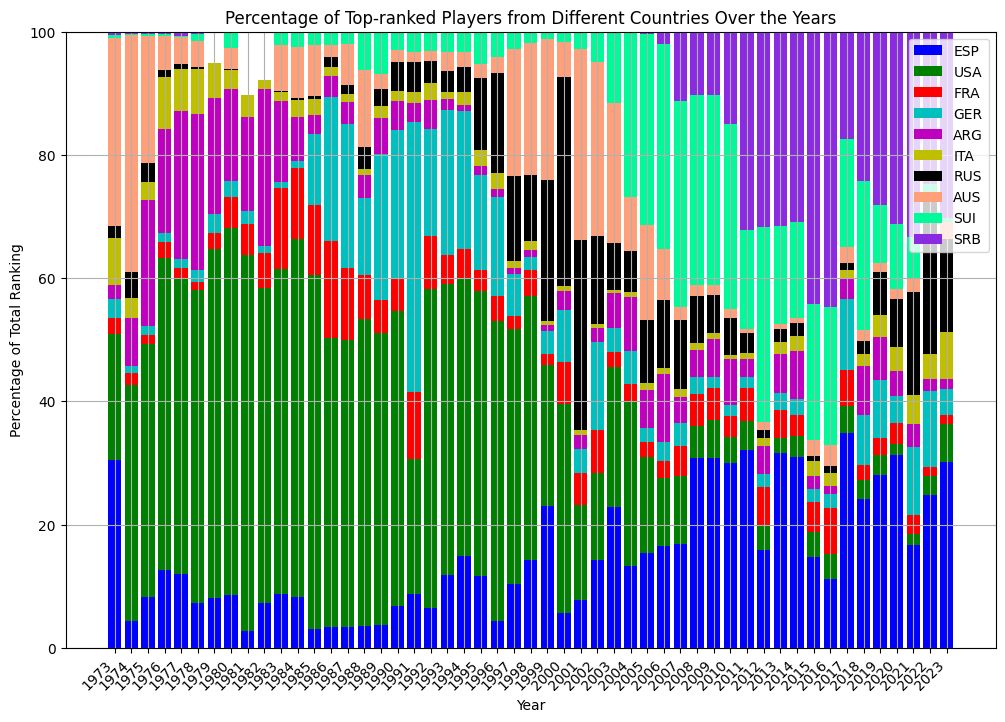

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming result_set is your result set from the SQL query
# Convert the result_set to a Pandas DataFrame
df = result_set.DataFrame()

# Extract countries and their respective columns
countries = ['ESP', 'USA', 'FRA', 'GER', 'ARG', 'ITA', 'RUS', 'AUS', 'SUI', 'SRB']

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', '#FFA07A', '#00FA9A', '#8A2BE2']

# Invert the ranking values
df[countries] = 1 / df[countries]

# Calculate the total ranking for each year
df['total_ranking'] = df[countries].sum(axis=1)

# Calculate the percentage of ranking for each country
for country in countries:
    df[country + '_percentage'] = (df[country] / df['total_ranking']) * 100.0

# Plot the data as a stacked bar chart
plt.figure(figsize=(12, 8))

bottom = None
for i, country in enumerate(countries):
    plt.bar(df['year'], df[country + '_percentage'], label=country, color=colors[i], bottom=bottom)
    if bottom is None:
        bottom = df[country + '_percentage']
    else:
        bottom += df[country + '_percentage']

plt.title('Percentage of Top-ranked Players from Different Countries Over the Years')
plt.xlabel('Year')
plt.ylabel('Percentage of Total Ranking')
plt.legend(loc='upper right')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

plt.grid(True)
plt.show()


This is some interesting data to look at. As we can see, Spain has always had a player ranked high throughout the years. They must invest a lot into their professional athletes! We can see that the US dominated up until the 2000s and we can also see the contributions made by the big three to their respective countries (SRB, ESP, and SUI).

Let's take a look at how our home country (USA) has done over the years.

In [27]:
%%sql
WITH RankedPlayers AS (
    SELECT
        year,
        player_name,
        ROW_NUMBER() OVER(PARTITION BY year, player_name ORDER BY rank ASC) AS rn
    FROM
        player_rankings
    WHERE ioc = 'USA'
)

SELECT DISTINCT
    RP.player_name,
    R.rank,
    R.ioc,
    R.year
FROM
    RankedPlayers RP
JOIN
    player_rankings R ON RP.year = R.year AND RP.player_name = R.player_name
WHERE
    RP.rn = 1
ORDER BY
    R.rank, R.year
LIMIT
    25

 * sqlite:////Users/thomasyu/Desktop/Project/archive/database.sqlite
Done.


player_name,rank,ioc,year
Jimmy Connors,1,USA,1974
Jimmy Connors,1,USA,1975
Jimmy Connors,1,USA,1976
Jimmy Connors,1,USA,1977
Jimmy Connors,1,USA,1978
Jimmy Connors,1,USA,1979
John McEnroe,1,USA,1980
John McEnroe,1,USA,1981
John McEnroe,1,USA,1982
Jimmy Connors,1,USA,1982


As you can see, a lot of Americans have reached the number 1 ranking. So let's take a look at rankings in recent years, specifically 2023. 

In [28]:
%%sql
WITH RankedPlayers AS (
    SELECT
        year,
        player_name,
        ROW_NUMBER() OVER(PARTITION BY year, player_name ORDER BY rank ASC) AS rn
    FROM
        player_rankings
    WHERE ioc = 'USA'
)

SELECT DISTINCT
    RP.player_name,
    R.rank,
    R.ioc,
    R.year
FROM
    RankedPlayers RP
JOIN
    player_rankings R ON RP.year = R.year AND RP.player_name = R.player_name
WHERE
    RP.rn = 1
ORDER BY
    R.year DESC, R.rank
LIMIT
    25


 * sqlite:////Users/thomasyu/Desktop/Project/archive/database.sqlite
Done.


player_name,rank,ioc,year
Taylor Fritz,5,USA,2023
Taylor Fritz,7,USA,2023
Taylor Fritz,8,USA,2023
Taylor Fritz,9,USA,2023
Taylor Fritz,10,USA,2023
Frances Tiafoe,10,USA,2023
Frances Tiafoe,11,USA,2023
Frances Tiafoe,12,USA,2023
Tommy Paul,12,USA,2023
Tommy Paul,13,USA,2023


Pretty cool! We see our top Americans in recent years. Taylor Fritz seems to be our top guy this year. We could do this for any country that we want!

We can do the same for any country that appears in the database. Enter a country! Note that we need country abbreviation.

In [29]:
# Define the SQL query template
sql_query = "SELECT COUNT(*) FROM player_rankings WHERE ioc = :country_input"

while True:
    # Take user input for the country
    country_input = input("Enter a country abbreviation in caps (or 'exit' to stop): ")

    # Check if the user wants to exit
    if country_input.lower() == 'exit':
        print("Exiting...")
        break

    # Execute SQL query to check if the country exists
    result = %sql $sql_query

    # Extract the count from the result
    count = result[0][0]

    # Check if the country exists
    if count > 0:
        print(f"The country '{country_input}' is in the database.")
        break
    else:
        print(f"The country '{country_input}' is not in the database. Please try again.")

 * sqlite:////Users/thomasyu/Desktop/Project/archive/database.sqlite
Done.
The country 'ESP' is in the database.


Run the next cell for information for this specific country!

In [30]:
%%sql
WITH RankedPlayers AS (
    SELECT
        year,
        player_name,
        ROW_NUMBER() OVER(PARTITION BY year, player_name ORDER BY rank ASC) AS rn
    FROM
        player_rankings
    WHERE ioc = '{country_input}'
)

SELECT
    RP.player_name,
    R.rank,
    R.points,
    R.ioc,
    R.year
FROM
    RankedPlayers RP
JOIN
    player_rankings R ON RP.year = R.year AND RP.player_name = R.player_name
WHERE
    RP.rn = 1
ORDER BY
    R.year DESC, R.rank
LIMIT
    25


 * sqlite:////Users/thomasyu/Desktop/Project/archive/database.sqlite
Done.


player_name,rank,points,ioc,year
Carlos Alcaraz,1,6820.0,ESP,2023
Carlos Alcaraz,1,6820.0,ESP,2023
Carlos Alcaraz,1,6820.0,ESP,2023
Carlos Alcaraz,1,7420.0,ESP,2023
Carlos Alcaraz,1,6815.0,ESP,2023
Carlos Alcaraz,1,6815.0,ESP,2023
Carlos Alcaraz,1,7675.0,ESP,2023
Carlos Alcaraz,1,7675.0,ESP,2023
Carlos Alcaraz,1,9675.0,ESP,2023
Carlos Alcaraz,1,9375.0,ESP,2023


# Player Analysis

Let's see an example of the matches data.

In [31]:
%%sql
SELECT
    *
FROM
    matches
LIMIT
    1

 * sqlite:////Users/thomasyu/Desktop/Project/archive/database.sqlite
Done.


tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,winner1_id,winner2_id,loser1_id,loser2_id,winner1_name,winner1_hand,winner1_ht,winner1_ioc,winner1_age,winner2_name,winner2_hand,winner2_ht,winner2_ioc,winner2_age,loser1_name,loser1_hand,loser1_ht,loser1_ioc,loser1_age,loser2_name,loser2_hand,loser2_ht,loser2_ioc,loser2_age,winner1_rank,winner1_rank_points,winner2_rank,winner2_rank_points,loser1_rank,loser1_rank_points,loser2_rank,loser2_rank_points
2003-1536,Madrid Masters,Hard,48,M,20031013.0,1,101965.0,None,None,Wayne Ferreira,R,185.0,RSA,32.0,103344.0,None,None,Ivan Ljubicic,R,193.0,CRO,24.5,7-6(7) 7-6(5),3,R64,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,28.0,1090.0,42.0,865.0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


Alright, we can make an analysis of specific players. Enter a professional tennis player!

In [32]:
# Define the SQL query template
sql_query = "SELECT COUNT(*) FROM player_rankings WHERE player_name = :player_name_input"

while True:
    # Take user input for the player name
    player_name_input = input("Enter a player name (or 'exit' to stop): ")

    # Check if the user wants to exit
    if player_name_input.lower() == 'exit':
        print("Exiting...")
        break

    # Execute SQL query to check if the player name exists
    result = %sql $sql_query

    # Extract the count from the result
    count = result[0][0]

    # Check if the player name exists
    if count > 0:
        print(f"The player name '{player_name_input}' is in the database.")
        break
    else:
        print(f"The player name '{player_name_input}' is not in the database. Please try again.")


 * sqlite:////Users/thomasyu/Desktop/Project/archive/database.sqlite
Done.
The player name 'Novak Djokovic' is in the database.


Lets show the matches that this player most recently played.

In [33]:
%%sql
SELECT
    *
FROM
    matches
WHERE
    winner_name = :player_name_input OR loser_name = :player_name_input
ORDER BY
    tourney_date DESC
LIMIT
    10


 * sqlite:////Users/thomasyu/Desktop/Project/archive/database.sqlite
Done.


tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,winner1_id,winner2_id,loser1_id,loser2_id,winner1_name,winner1_hand,winner1_ht,winner1_ioc,winner1_age,winner2_name,winner2_hand,winner2_ht,winner2_ioc,winner2_age,loser1_name,loser1_hand,loser1_ht,loser1_ioc,loser1_age,loser2_name,loser2_hand,loser2_ht,loser2_ioc,loser2_age,winner1_rank,winner1_rank_points,winner2_rank,winner2_rank_points,loser1_rank,loser1_rank_points,loser2_rank,loser2_rank_points
2023-0605,Tour Finals,Hard,8,A,20231113.0,300,104925.0,1.0,None,Novak Djokovic,R,188.0,SRB,36.4,206173.0,4.0,None,Jannik Sinner,R,188.0,ITA,22.2,6-3 6-3,3,F,103.0,13.0,0.0,46.0,32.0,29.0,9.0,9.0,2.0,2.0,8.0,1.0,74.0,49.0,28.0,12.0,9.0,5.0,8.0,1.0,9945.0,4.0,5490.0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2023-0605,Tour Finals,Hard,8,A,20231113.0,298,104925.0,1.0,None,Novak Djokovic,R,188.0,SRB,36.4,207989.0,2.0,None,Carlos Alcaraz,R,185.0,ESP,20.5,6-3 6-2,3,SF,88.0,2.0,1.0,55.0,37.0,30.0,10.0,9.0,4.0,4.0,10.0,1.0,56.0,47.0,29.0,3.0,8.0,5.0,8.0,1.0,9945.0,2.0,8455.0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2023-0605,Tour Finals,Hard,8,A,20231113.0,297,206173.0,4.0,None,Jannik Sinner,R,188.0,ITA,22.2,104925.0,1.0,None,Novak Djokovic,R,188.0,SRB,36.4,7-5 6-7(5) 7-6(2),3,RR,189.0,15.0,2.0,118.0,71.0,56.0,26.0,18.0,2.0,3.0,20.0,1.0,100.0,63.0,51.0,22.0,18.0,1.0,3.0,4.0,5490.0,1.0,9945.0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2023-0605,Tour Finals,Hard,8,A,20231113.0,296,104925.0,1.0,None,Novak Djokovic,R,188.0,SRB,36.4,128034.0,9.0,None,Hubert Hurkacz,R,196.0,POL,26.7,7-6(1) 4-6 6-1,3,RR,125.0,6.0,1.0,81.0,51.0,38.0,22.0,15.0,0.0,1.0,24.0,6.0,89.0,52.0,44.0,12.0,14.0,5.0,7.0,1.0,9945.0,9.0,3245.0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2023-0605,Tour Finals,Hard,8,A,20231113.0,295,104925.0,1.0,None,Novak Djokovic,R,188.0,SRB,36.4,208029.0,8.0,None,Holger Rune,R,185.0,DEN,20.5,7-6(4) 6-7(1) 6-3,3,RR,184.0,10.0,4.0,108.0,74.0,55.0,14.0,17.0,3.0,6.0,18.0,7.0,109.0,66.0,49.0,18.0,16.0,4.0,8.0,1.0,9945.0,8.0,3460.0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2023-0352,Paris Masters,Hard,64,M,20231030.0,300,104925.0,1.0,None,Novak Djokovic,R,188.0,SRB,36.4,105777.0,None,None,Grigor Dimitrov,R,188.0,BUL,32.4,6-4 6-3,3,F,98.0,6.0,1.0,48.0,32.0,26.0,11.0,9.0,0.0,0.0,5.0,2.0,68.0,35.0,25.0,14.0,10.0,1.0,4.0,1.0,11045.0,17.0,2060.0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2023-0352,Paris Masters,Hard,64,M,20231030.0,299,104925.0,1.0,None,Novak Djokovic,R,188.0,SRB,36.4,126094.0,5.0,None,Andrey Rublev,R,188.0,RUS,26.0,5-7 7-6(3) 7-5,3,SF,181.0,17.0,5.0,118.0,79.0,58.0,23.0,18.0,4.0,6.0,16.0,2.0,112.0,77.0,56.0,20.0,18.0,6.0,8.0,1.0,11045.0,5.0,4935.0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2023-0352,Paris Masters,Hard,64,M,20231030.0,297,104925.0,1.0,Non

We can see all the results from this year.

In [34]:
%%sql result_set <<
WITH MatchResults AS (
    SELECT
        CASE WHEN winner_name = :player_name_input THEN loser_name ELSE winner_name END AS opponent,
        CASE WHEN winner_name = :player_name_input THEN 'Win' ELSE 'Loss' END AS result,
        CASE WHEN winner_name = :player_name_input THEN loser_rank ELSE winner_rank END AS opponent_rank,
        tourney_date,
        score
    FROM
        matches
    WHERE
        (winner_name = :player_name_input OR loser_name = :player_name_input)
        AND SUBSTR(tourney_date, 1, 4) = '2023'
)
SELECT
    opponent,
    result,
    opponent_rank,
    tourney_date,
    score
FROM
    MatchResults
UNION ALL
SELECT
    'Total',
    '',
    '',
    '',
    COUNT(*) || ' Matches'
FROM
    MatchResults


 * sqlite:////Users/thomasyu/Desktop/Project/archive/database.sqlite
Done.
Returning data to local variable result_set


In [35]:
df = result_set.DataFrame()
pd.set_option('display.max_rows', 1000)
display(df)

,opponent,result,opponent_rank,tourney_date,score
0,Sebastian Korda,Win,33.0,20230102.0,6-7(8) 7-6(3) 6-4
1,Daniil Medvedev,Win,7.0,20230102.0,6-3 6-4
2,Denis Shapovalov,Win,18.0,20230102.0,6-3 6-4
3,Quentin Halys,Win,64.0,20230102.0,7-6(3) 7-6(5)
4,Constant Lestienne,Win,65.0,20230102.0,6-3 6-2
5,Roberto Carballes Baena,Win,75.0,20230116.0,6-3 6-4 6-0
6,Enzo Couacaud,Win,191.0,20230116.0,6-1 6-7(5) 6-2 6-0
7,Grigor Dimitrov,Win,28.0,20230116.0,7-6(7) 6-3 6-4
8,Alex De Minaur,Win,24.0,20230116.0,6-2 6-1 6-2
9,Andrey Rublev,Win,6.0,20230116.0,6-1 6-2 6-4


We will graphically represent the players wins and losses. You can notice interesting patterns in their performance against players of different ranks.

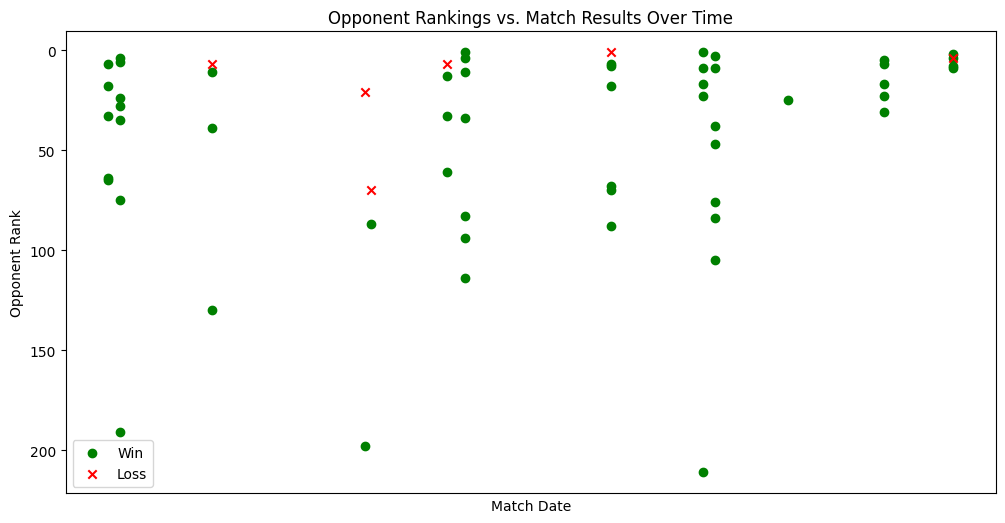

In [36]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Filter out the 'Total' row if it exists
df_plot = df[df['result'].isin(['Win', 'Loss'])]

# Create a scatter plot
plt.figure(figsize=(12, 6))

# Plot wins (green circles)
plt.scatter(
    pd.to_datetime(df_plot[df_plot['result'] == 'Win']['tourney_date']),
    df_plot[df_plot['result'] == 'Win']['opponent_rank'],
    color='green',
    marker='o',
    label='Win'
)

# Plot losses (red "x" markers)
plt.scatter(
    pd.to_datetime(df_plot[df_plot['result'] == 'Loss']['tourney_date']),
    df_plot[df_plot['result'] == 'Loss']['opponent_rank'],
    color='red',
    marker='x',
    label='Loss'
)

# Set plot labels and title
plt.xlabel('Match Date')
plt.ylabel('Opponent Rank')
plt.title('Opponent Rankings vs. Match Results Over Time')
plt.legend()

# Remove x-axis ticks (labels)
plt.xticks([])

# Flip the y-axis
plt.gca().invert_yaxis()

# Show the plot
plt.show()
